In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from google.colab import files


down load "diabetes dataset"from GitHub

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv',header=None)

defining columns names according to data description

In [ ]:
df.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

reading data

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


<Axes: >

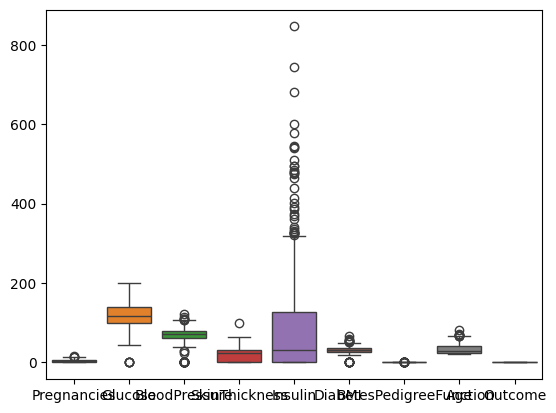

In [ ]:
sns.boxplot(data=df)

remove outliers from pregnancies column

In [ ]:
  q1 = df['Pregnancies'].quantile(0.25)
  q3 = df['Pregnancies'].quantile(0.75)
  iqr = q3-q1



replace outliers with median in another columns

In [ ]:

  df = df[~((df['Pregnancies']<(q1-1.5*iqr))|(df['Pregnancies']>(q3+1.5*iqr)))]
  columns_to_fix = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
  for column in columns_to_fix:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  median = df[column].median()
  df.loc[df[column] < lower_bound,column] = median
  df.loc[df[column] > upper_bound,column] = median

replace zero bec.its not logical


In [ ]:
columns_zero_fix = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in columns_zero_fix:
  median = df[column].median()
  df.loc[df[column] == 0,column]=median


In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,27,33.6,0.627,50,1
1,1,85,66,29,27,26.6,0.351,31,0
2,8,183,64,23,27,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,23,27,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,72,23,27,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,23,27,32.0,0.232,54,1


we choose columns which we want to check


In [ ]:
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\noutlires{col}:")
    print(outliers[[col]])
    print(f"number of outlires{col}: {outliers.shape[0]}")



outliresPregnancies:
Empty DataFrame
Columns: [Pregnancies]
Index: []
number of outliresPregnancies: 0

outliresGlucose:
Empty DataFrame
Columns: [Glucose]
Index: []
number of outliresGlucose: 0

outliresBloodPressure:
     BloodPressure
18              30
43             110
84             108
106            122
125             30
177            110
362            108
549            110
597             24
599             38
658            106
662            106
672            106
691            114
number of outliresBloodPressure: 14

outliresSkinThickness:
     SkinThickness
16              47
39              47
57              60
86              54
99              51
120             56
150             50
177             46
211             54
254              7
273             50
275             52
370             48
382              8
409             49
422             46
428             46
434              8
445             63
458             48
519              7
532             5

In [ ]:
#for col in df.columns[:-1]:
 # plt.figure()
  #sns.boxplot(x=df[col])
  #plt.title(f'Boxplot for {col}')
  #plt.show()

check if 'DiabetesPedigreeFunction' is =29

In [ ]:
df['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 , 0.323,
       0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801, 0.207,
       0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539, 0.22 ,
       0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496, 0.452,
       0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597, 0.532,
       0.703, 0.159,

FIRST MODEL
GAUSSIAN

In [ ]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

StandardScaler

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model = GaussianNB()
model.fit(x_train_scaled,y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(x_test_scaled)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       108
           1       0.61      0.69      0.65        45

    accuracy                           0.78       153
   macro avg       0.74      0.75      0.74       153
weighted avg       0.79      0.78      0.78       153

Confusion Matrix:
 [[88 20]
 [14 31]]


******            ******         *******

SECOND Model
COMPLEMENT


In [ ]:
#recall data again without making standardscaler
x = df.drop('Outcome', axis=1)
y = df['Outcome']

re-partiton the data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
x_train_scaled_mm = scaler.fit_transform(x_train)
x_test_scaled_mm = scaler.transform(x_test)

In [ ]:
# training Complement
model_Complement = ComplementNB()
model_Complement.fit(x_train_scaled_mm,y_train)

ComplementNB()

In [ ]:
y_pred_complement = model_Complement.predict(x_test_scaled_mm)
print("Accuracy:",accuracy_score(y_test,y_pred_complement))
print("Classification Report:\n",classification_report(y_test,y_pred_complement))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_complement))

Accuracy: 0.6797385620915033
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       108
           1       0.46      0.51      0.48        45

    accuracy                           0.68       153
   macro avg       0.62      0.63      0.63       153
weighted avg       0.69      0.68      0.68       153

Confusion Matrix:
 [[81 27]
 [22 23]]


this bar chart compares the performance of "Gaussian Naive Bayes & Complement Naive Bayes"...Based on :Accuracy , F1-Score , Recall metrics :

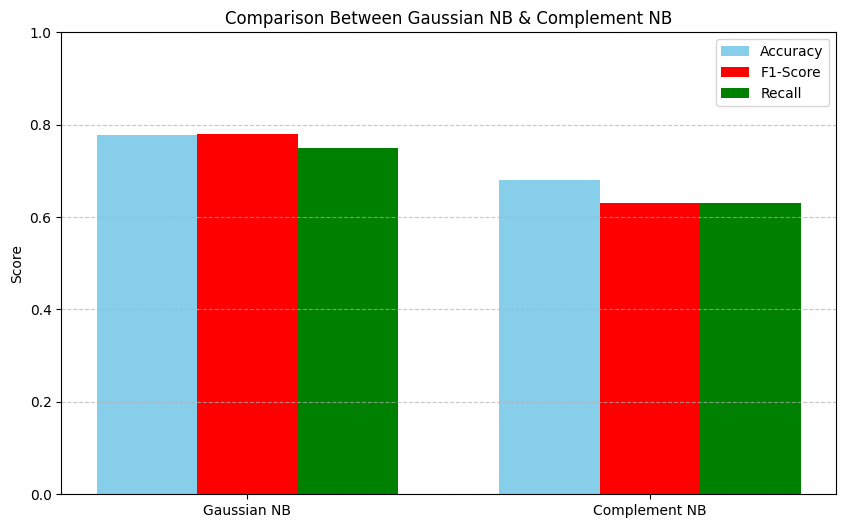

In [ ]:
models = ['Gaussian NB' , 'Complement NB']
accuracy = [0.7777, 0.6797]
f1_score = [0.78, 0.63]
recall = [0.75, 0.63]
x = range(len(models))
width = 0.25
plt.figure(figsize=(10,6))
plt.bar([i - width for i in x],accuracy,width=width,label='Accuracy',color='skyblue')
plt.bar([i for i in x],f1_score,width=width,label='F1-Score',color='red')
plt.bar([i + width for i in x],recall,width=width,label='Recall',color='green')

plt.xticks(x, models)
plt.ylabel('Score')
plt.title('Comparison Between Gaussian NB & Complement NB')
plt.ylim(0,1)
plt.legend()
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.show()